# Non Linear regression using the diabetes dataset

This example follows on from the previous [linear regression](https://github.com/morganics/bayesianpy/blob/master/examples/notebook/diabetes_linear_regression.ipynb) example, to demonstrate how additional latent states are synonymous with the number of degrees of freedom in traditional non-linear regression (e.g. non-linear least squares).

I'm not going to spend much time explaining the code. The only difference to the linear regression is the additional 'Cluster' variable specified in the MixtureNaiveBayes template. I can start off with 2 latent states.

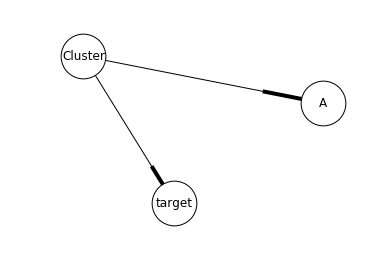

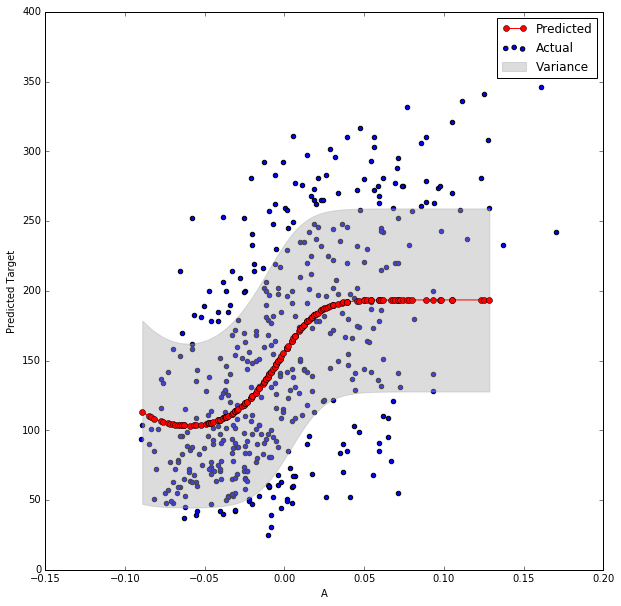

R2 score: 0.30268406433065653


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import r2_score

import sys
sys.path.append("../../../bayesianpy")

import bayesianpy

import pandas as pd
import logging
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
df = pd.DataFrame({'A': [x[0] for x in diabetes_X], 'target': diabetes.target})
train, test = train_test_split(df, test_size=0.4)

logger = logging.getLogger()
bayesianpy.jni.attach(logger)
f = bayesianpy.utils.get_path_to_parent_dir('')

with bayesianpy.data.DataSet(df, f, logger) as dataset:
    tpl = bayesianpy.template.MixtureNaiveBayes(logger, continuous=df, latent_states=2)
    network = tpl.create(bayesianpy.network.NetworkFactory(logger))

    plt.figure()
    layout = bayesianpy.visual.NetworkLayout(network)
    graph = layout.build_graph()
    pos = layout.fruchterman_reingold_layout(graph)
    layout.visualise(graph, pos)

    model = bayesianpy.model.NetworkModel(network, logger)

    model.train(dataset.subset(train.index.tolist()))
    
    results = model.batch_query(dataset.subset(test.index.tolist()),
                 [bayesianpy.model.QueryMeanVariance('target',output_dtype=df['target'].dtype)])

    results.sort_values(by='A', ascending=True, inplace=True)
    plt.figure(figsize=(10, 10))
    plt.scatter(df['A'].tolist(), df['target'].tolist(), label='Actual')
    plt.plot(results['A'], results['target_mean'], 'ro-', label='Predicted')

    plt.fill_between(results.A, 
                     results.target_mean-results.target_variance.apply(np.sqrt),
                     results.target_mean+results.target_variance.apply(np.sqrt),
                     color='darkgrey', alpha=0.4,
                     label='Variance'
                     )
    plt.xlabel("A")
    plt.ylabel("Predicted Target")
    plt.legend()
    plt.show()
    
    print("R2 score: {}".format(r2_score(results.target.tolist(), results.target_mean.tolist())))

With 5 latent states:

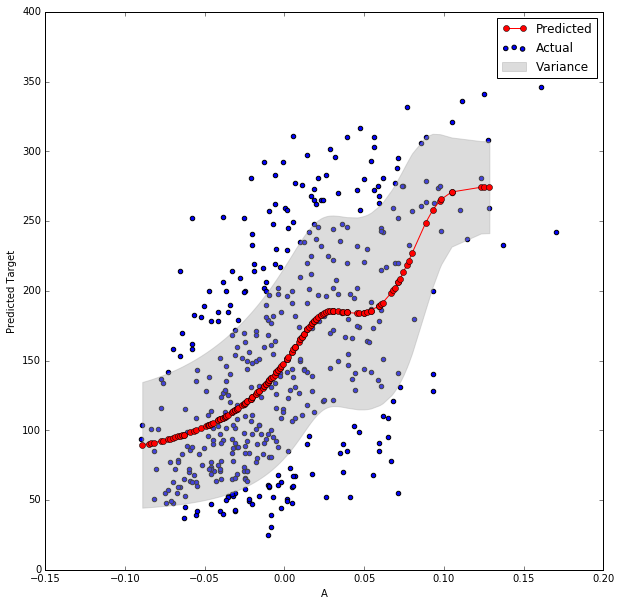

In [14]:
with bayesianpy.data.DataSet(df, f, logger) as dataset:
    tpl = bayesianpy.template.MixtureNaiveBayes(logger, continuous=df, latent_states=5)
    network = tpl.create(bayesianpy.network.NetworkFactory(logger))

    model = bayesianpy.model.NetworkModel(network, logger)

    model.train(dataset.subset(train.index.tolist()))
    
    results = model.batch_query(dataset.subset(test.index.tolist()),
                 [bayesianpy.model.QueryMeanVariance('target',output_dtype=df['target'].dtype)])

    results.sort_values(by='A', ascending=True, inplace=True)
    plt.figure(figsize=(10, 10))
    plt.scatter(df['A'].tolist(), df['target'].tolist(), label='Actual')
    plt.plot(results['A'], results['target_mean'], 'ro-', label='Predicted')

    plt.fill_between(results.A, 
                     results.target_mean-results.target_variance.apply(np.sqrt),
                     results.target_mean+results.target_variance.apply(np.sqrt),
                     color='darkgrey', alpha=0.4,
                     label='Variance'
                     )
    plt.xlabel("A")
    plt.ylabel("Predicted Target")
    plt.legend()
    plt.show()

In [15]:
print("R2 score: {}".format(r2_score(results.target.tolist(), results.target_mean.tolist())))

R2 score: 0.3541971236684113


Finally 10 latent states:

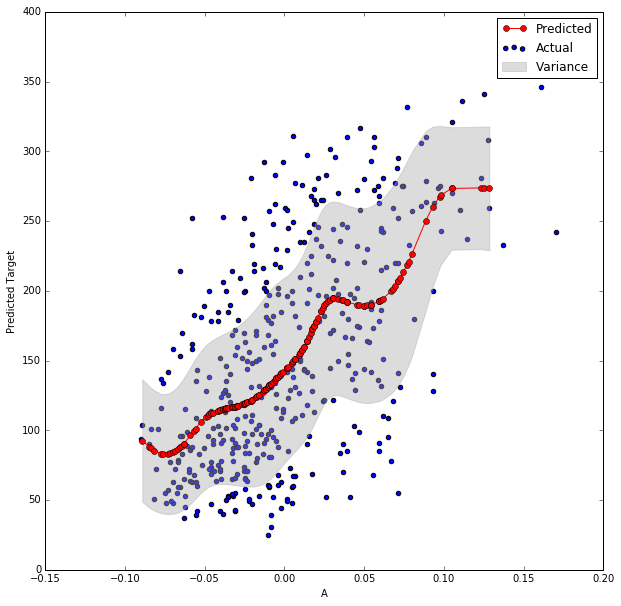

In [16]:
with bayesianpy.data.DataSet(df, f, logger) as dataset:
    tpl = bayesianpy.template.MixtureNaiveBayes(logger, continuous=df, latent_states=10)
    network = tpl.create(bayesianpy.network.NetworkFactory(logger))

    model = bayesianpy.model.NetworkModel(network, logger)

    model.train(dataset.subset(train.index.tolist()))
    
    results = model.batch_query(dataset.subset(test.index.tolist()),
                 [bayesianpy.model.QueryMeanVariance('target',output_dtype=df['target'].dtype)])

    results.sort_values(by='A', ascending=True, inplace=True)
    plt.figure(figsize=(10, 10))
    plt.scatter(df['A'].tolist(), df['target'].tolist(), label='Actual')
    plt.plot(results['A'], results['target_mean'], 'ro-', label='Predicted')

    plt.fill_between(results.A, 
                     results.target_mean-results.target_variance.apply(np.sqrt),
                     results.target_mean+results.target_variance.apply(np.sqrt),
                     color='darkgrey', alpha=0.4,
                     label='Variance'
                     )
    plt.xlabel("A")
    plt.ylabel("Predicted Target")
    plt.legend()
    plt.show()

In [17]:
print("R2 score: {}".format(r2_score(results.target.tolist(), results.target_mean.tolist())))

R2 score: 0.34773450507944936


Obviously, the R2 score doesn't take variance in to account, but it looks like we've reached peak R2 at around 5 latent states (incidentally, a similar iteration can be used to select the optimal number of latent states).

Our base R2 was around 0.34, so it seems like a linear regression model fits the data better than a non-linear regressor.